# Lab 2
#### (i finally got it working)

C:\Users\asiab\AppData\Local\Temp\ipykernel_26256\3918036619.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  wfdata = pd.read_csv(wfpath,


[1958, 1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]
  year_month  decimal date  average  deseasonalized  ndays  sdev   unc
0 1958-03-01     1958.2027   315.70          314.43     -1 -9.99 -0.99
1 1958-04-01     1958.2877   317.45          315.16     -1 -9.99 -0.99
2 1958-05-01     1958.3699   317.51          314.71     -1 -9.99 -0.99
   Years  Number of Fires  Area Burned  MAX_SIZE_HA  FIRES >200ha  \
0   2021             6709      4078897       271701           596   
1   2020             4001       218232        50892            80   
2   2019             4062      1786214       350135           192   

   TOTAL_HA (>200ha)  
0            4038710  
1             206153  
2            1765436  


Text(0, 0.5, 'Number of Fires')

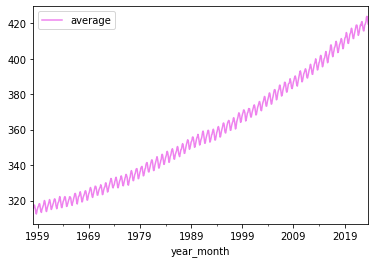

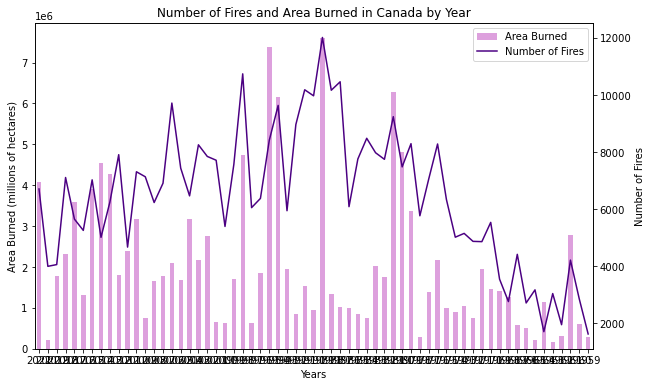

In [23]:
"""\n chatgpt was asked "demonstrate how to load data in python using pandas"\n """
#importing necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#linking files from directory
wfpath = 'Data/NFDB_point_stats.csv'
co2path = 'Data/co2_mm_mlo.csv'

#cleaning up data into a dataframe "sep=',',
#fixdata = "comment= '#', delimiter=','"

#wfdata = pd.read_csv(wfpath, fixdata, skiprows = 5,)

co2data = pd.read_csv(co2path,
                    delimiter=',', header= 26,
                    parse_dates=[[0,1]]
)

wfdata = pd.read_csv(wfpath,
                    delimiter=',',
                    header= 4,
                    #parse_dates=[0],
                    skipfooter= 3,
                    thousands=',',
                    skipinitialspace=1
)

wfdata.rename(columns={'YEAR':'Years', 'TOTAL_HA':'Area Burned', 'FIRES':'Number of Fires'}, inplace=True)


#Chat GPT was asked: please define a python function to create a list of every even  between 2 years given as arguments. make it as concise as possible

def years(yr1, yr2):
    return [i for i in range(yr1 + (yr1 % 2), yr2 + 1, 2)]

print(years(1958, 2023))

print(co2data.head(3))
print(wfdata.head(3))

co2data.plot.line(x = 'year_month', y= 'average', c = 'violet')

wfbar = wfdata.plot.bar(x = 'Years', y= 'Area Burned', color = 'plum')
wfline = wfdata.plot.line(x = 'Years', y= 'Number of Fires', ylabel= 'Area Burned (millions of hectares)', c='indigo', figsize= (10, 6),
                         sharex= 0, stacked= 1, ax = wfbar, use_index=False, secondary_y=True, mark_right= False,# xticks= years(1958, 2023),
                         title= 'Number of Fires and Area Burned in Canada by Year'
                         )
wfbar.right_ax.set_ylabel('Number of Fires')

#title should be 
#years should be every 10

#to do: fix x labels, add tail co2 data??, neaten and comment, remove anything unnecessary, add 2022 and 2023, etc :)